<a href="https://colab.research.google.com/github/iamdinithi/loan-prediction-model/blob/main/Random_Forest_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction using Random Forest and Logistic Regression algorithms
Author - Dinithi Weerabahu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# URL to the raw CSV file
url = "https://raw.githubusercontent.com/iamdinithi/loan-prediction-model/refs/heads/main/dataset/loan-data-randomized.csv"

# Load the dataset into a pandas DataFrame
try:
    data = pd.read_csv(url)
    print("Data loaded successfully!")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully!


**Inspect Structure and Content of the Dataset**

In [ ]:
# Get information about the dataset (columns, data types, non-null values)
print("Dataset Information: \n")
data.info()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100000 non-null  int64  
 1   loan_amnt        100000 non-null  int64  
 2   term             100000 non-null  object 
 3   int_rate         100000 non-null  float64
 4   installment      100000 non-null  float64
 5   emp_title        94171 non-null   object 
 6   emp_length       94201 non-null   object 
 7   annual_inc       100000 non-null  float64
 8   loan_status      100000 non-null  object 
 9   purpose          100000 non-null  object 
 10  dti              99958 non-null   float64
 11  fico_range_low   100000 non-null  int64  
 12  fico_range_high  100000 non-null  int64  
 13  inq_last_6mths   100000 non-null  int64  
 14  revol_util       99964 non-null   float64
dtypes: float64(5), int64(5), object(5)
memory usage: 11.4+ MB


**Check Missing Values**

In [ ]:
# Check for missing values in each column
print("Missing Values: \n")
print(data.isnull().sum().sort_values(ascending=False))

Missing Values: 

emp_title          5829
emp_length         5799
dti                  42
revol_util           36
id                    0
loan_amnt             0
term                  0
int_rate              0
installment           0
annual_inc            0
loan_status           0
purpose               0
fico_range_low        0
fico_range_high       0
inq_last_6mths        0
dtype: int64


**Drop ID column**

In [ ]:
data=data.drop('id',axis=1)
data.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,loan_status,purpose,dti,fico_range_low,fico_range_high,inq_last_6mths,revol_util
0,10000,36 months,6.24,305.31,Technical Support Engineer,10+ years,65000.0,Fully Paid,credit_card,17.17,750,754,0,19.6
1,4000,36 months,6.39,122.40,supervisor engineer,10+ years,91000.0,Fully Paid,home_improvement,14.70,705,709,0,79.3
2,6800,36 months,13.33,230.21,Marketing,10+ years,75000.0,Fully Paid,small_business,24.03,720,724,0,37.2
3,6000,36 months,9.17,191.28,Sr. Estimator,6 years,75000.0,Fully Paid,debt_consolidation,34.32,675,679,1,50.3
4,10000,36 months,7.89,312.86,SOFTWARE QA ANALYST CONSULTANT,10+ years,85000.0,Fully Paid,credit_card,11.24,665,669,0,51.1


### **Descriptive Analysis**

**Descriptive statistics of a DataFrame's numeric columns**

In [ ]:
# descriptive statistics of a DataFrame's numeric columns
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,revol_util
count,100000.000000,100000.000000,100000.000000,1.000000e+05,99958.000000,100000.000000,100000.000000,100000.000000,99964.000000
mean,14263.284500,12.006722,432.398449,7.847978e+04,18.378226,697.913000,701.913210,0.540770,49.701722
std,8773.709318,4.504546,262.639134,7.839856e+04,11.754737,33.122536,33.123472,0.837189,24.567431
min,1000.000000,5.310000,30.120000,0.000000e+00,0.000000,660.000000,664.000000,0.000000,0.000000
25%,7500.000000,8.180000,240.367500,4.700000e+04,11.730000,670.000000,674.000000,0.000000,31.000000
50%,12000.000000,11.530000,366.760000,6.500000e+04,17.580000,690.000000,694.000000,0.000000,49.400000
75%,20000.000000,14.460000,578.212500,9.500000e+04,24.180000,715.000000,719.000000,1.000000,68.400000
max,40000.000000,30.990000,1719.830000,9.225000e+06,999.000000,845.000000,850.000000,6.000000,127.100000


**Boxplots for Outlier Detection**

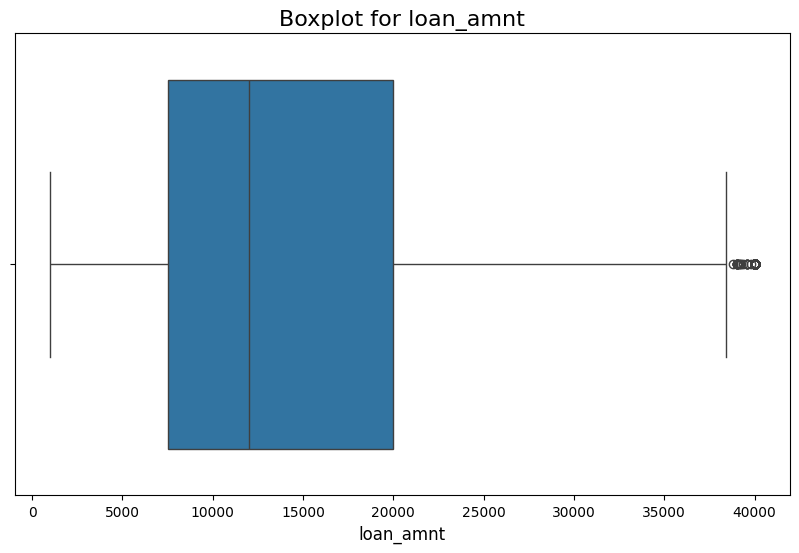

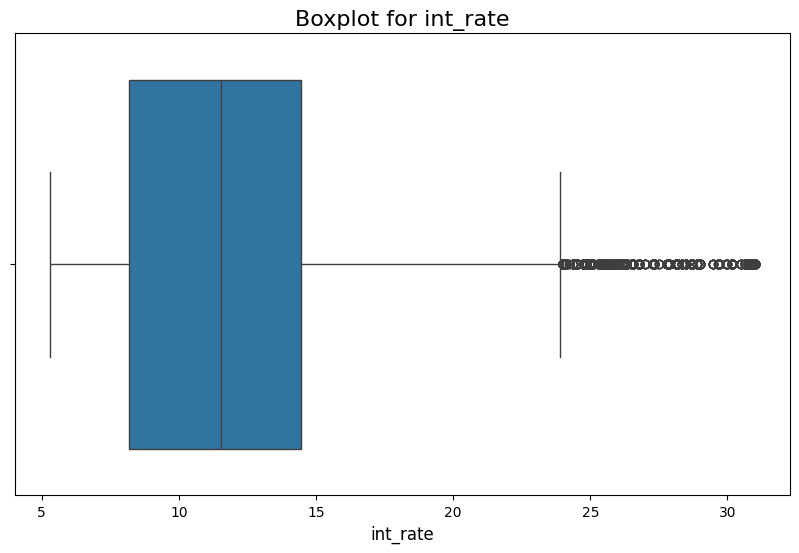

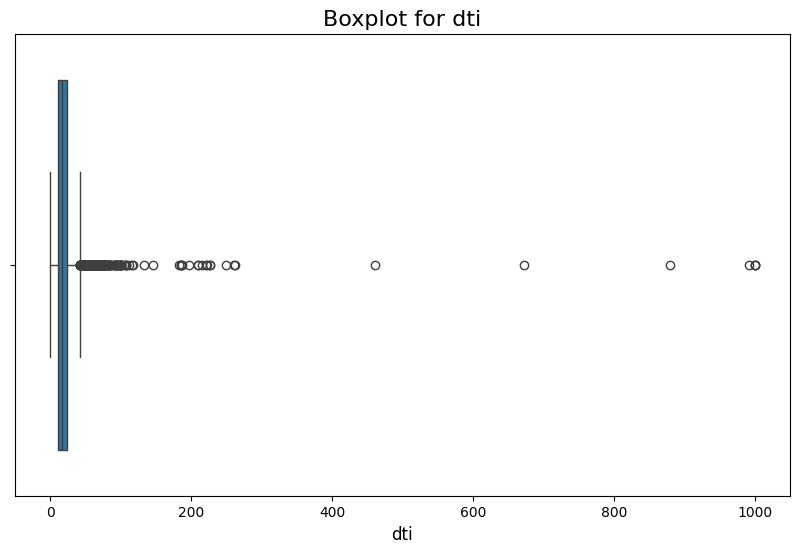

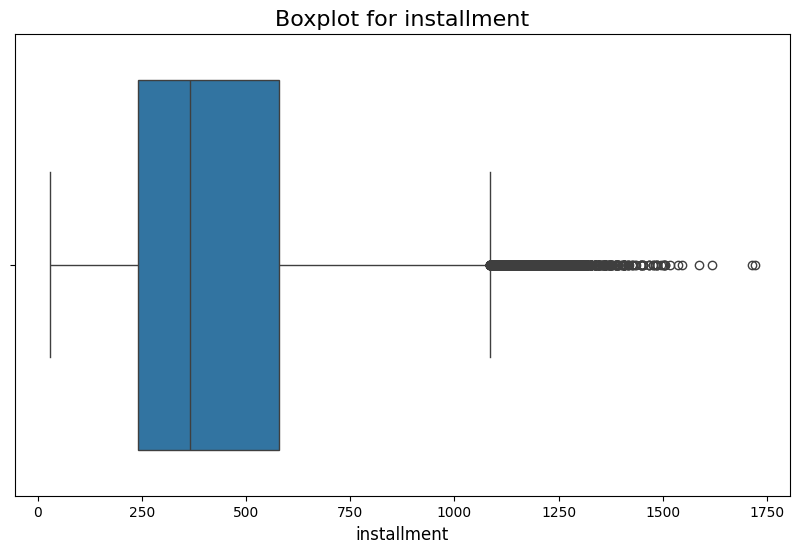

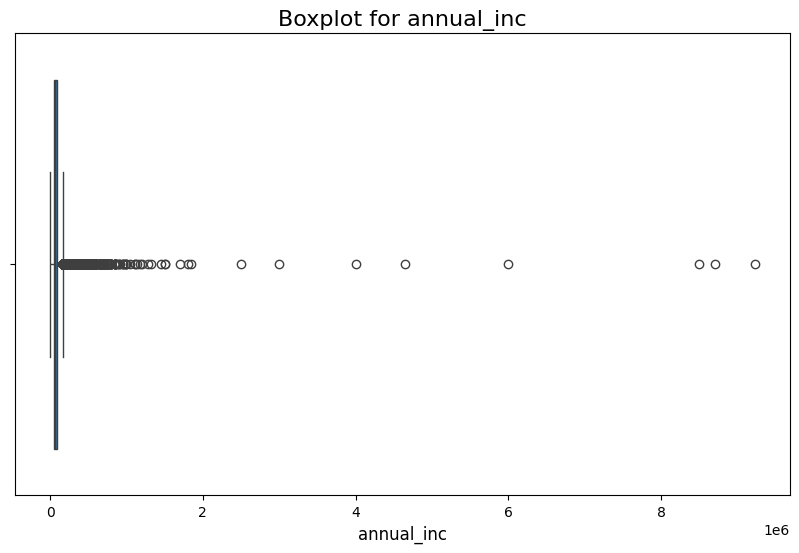

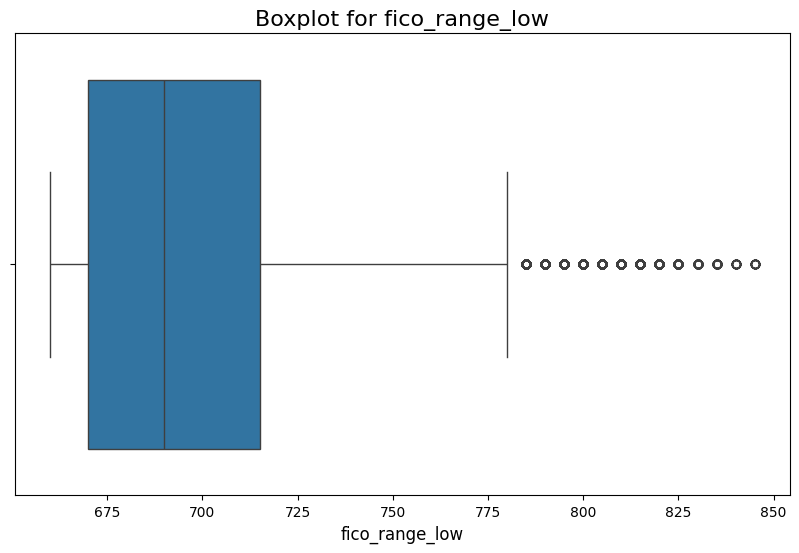

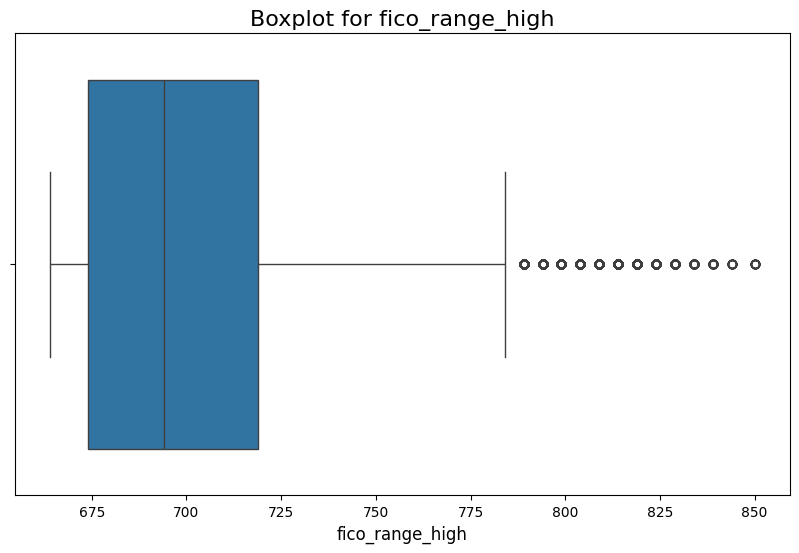

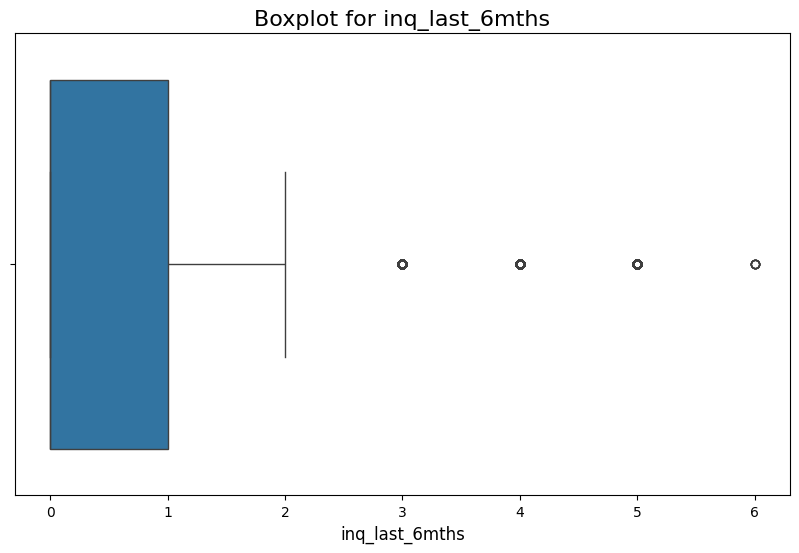

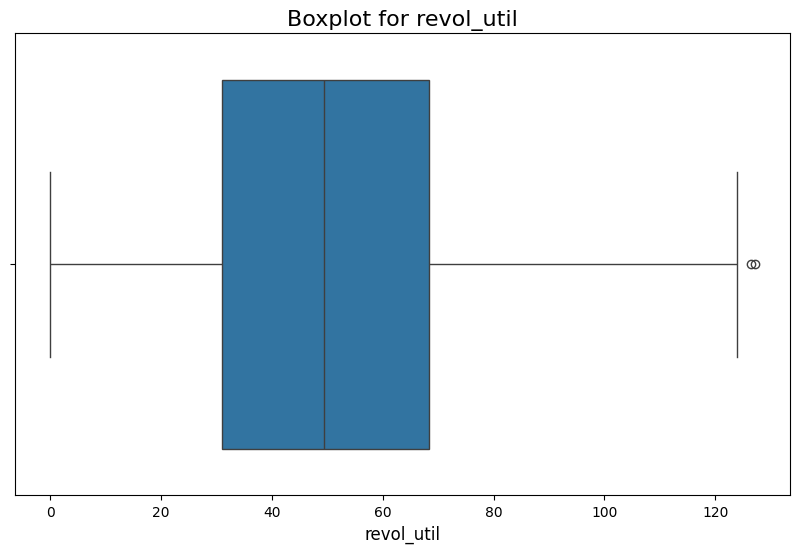

In [ ]:
# Features to check for outliers
features_to_check = ['loan_amnt', 'int_rate', 'dti','installment','annual_inc','fico_range_low','fico_range_high','inq_last_6mths','revol_util']

# Plot boxplots
for feature in features_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot for {feature}", fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.show()

**Correlation Heatmap**

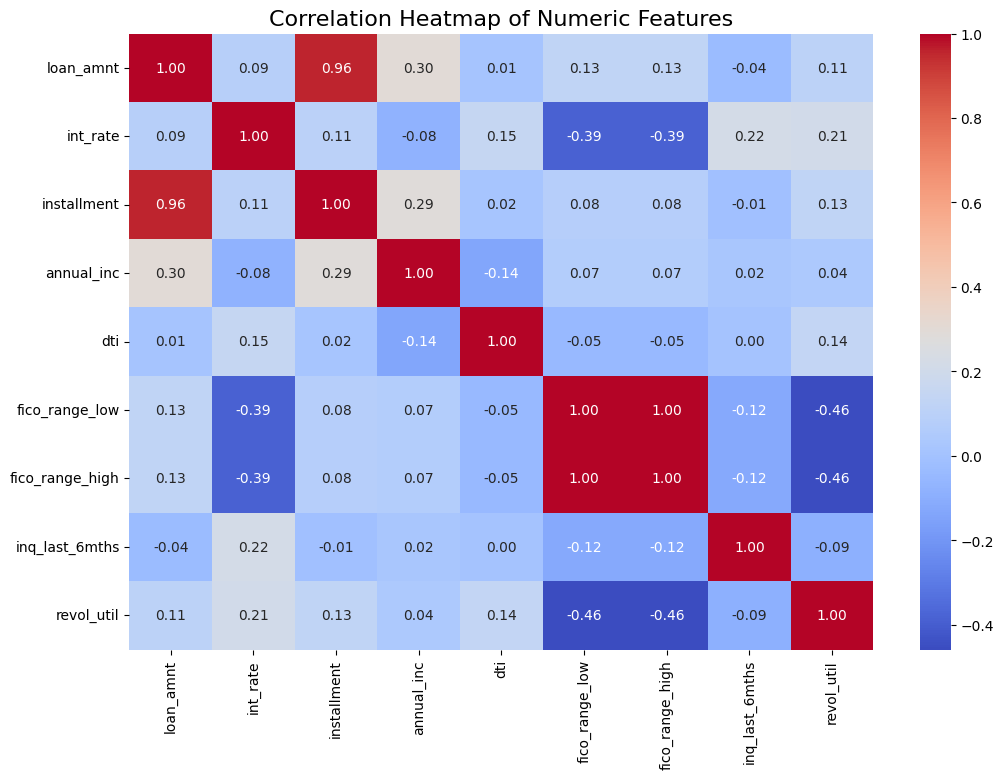

In [ ]:
# Select only numeric features for correlation analysis
numeric_features = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

Strong positive correlation between fico_range_low and fico_range_high. Might need to drop one.

### **Handle Missing Data**

For categorical fields (emp_title, emp_length), filling with a placeholder like "Unknown" & 0 years.
For numerical fields (dti, revol_util) using the median.

In [ ]:
# Fill missing 'emp_title' with 'Unknown'
data['emp_title'] = data['emp_title'].fillna('Unknown')

# Fill missing 'emp_length' with '0 years'
data['emp_length'] = data['emp_length'].fillna('0 years')

# Impute missing 'dti' and 'revol_util' with their median values
data['dti'] = data['dti'].fillna(data['dti'].median())
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())


**Encode Categorical values**

In [ ]:
# Convert 'term' to numeric (36 months -> 36, 60 months -> 60)
data['term'] = data['term'].str.extract('(\d+)').astype(int)

# Encode 'loan_status' (Fully Paid -> 0, Default -> 1)
data['loan_status'] = data['loan_status'].map({'Fully Paid': 0, 'Default': 1})

# One-hot encode 'purpose'
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)


In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,loan_status,dti,fico_range_low,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000,36,6.24,305.31,Technical Support Engineer,10+ years,65000.0,0,17.17,750,...,False,False,False,False,False,False,False,False,False,False
1,4000,36,6.39,122.40,supervisor engineer,10+ years,91000.0,0,14.70,705,...,True,False,False,False,False,False,False,False,False,False
2,6800,36,13.33,230.21,Marketing,10+ years,75000.0,0,24.03,720,...,False,False,False,False,False,False,False,True,False,False
3,6000,36,9.17,191.28,Sr. Estimator,6 years,75000.0,0,34.32,675,...,False,False,False,False,False,False,False,False,False,False
4,10000,36,7.89,312.86,SOFTWARE QA ANALYST CONSULTANT,10+ years,85000.0,0,11.24,665,...,False,False,False,False,False,False,False,False,False,False


**Create New Features**

In [ ]:
# import regular expressions
import re

# Convert 'emp_length' to numeric
# (e.g., '10+ years' -> 10, '< 1 year' -> 0.5, '3 years' -> 3)
data['emp_length'] = data['emp_length'].str.extract('(\d+)') # Extract numeric part using regex
data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce').fillna(0)  #Convert to numeric, errors to NaN, then fill NaN with 0
#The reason for using errors coerce is if there are strings cannot be converted into numbers, like "Unknown" or "N/A", they will be replaced with NaN values.
data['emp_length'] = data['emp_length'].replace({'< 1': 0.5}) #Manually replace cases that can't be captured with regex like "< 1 year"

# Create a new feature: High Debt-to-Income Ratio (1 if dti > 35, else 0)
data['high_dti'] = (data['dti'] > 35).astype(int)

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,loan_status,dti,fico_range_low,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,high_dti
0,10000,36,6.24,305.31,Technical Support Engineer,10,65000.0,0,17.17,750,...,False,False,False,False,False,False,False,False,False,0
1,4000,36,6.39,122.40,supervisor engineer,10,91000.0,0,14.70,705,...,False,False,False,False,False,False,False,False,False,0
2,6800,36,13.33,230.21,Marketing,10,75000.0,0,24.03,720,...,False,False,False,False,False,False,True,False,False,0
3,6000,36,9.17,191.28,Sr. Estimator,6,75000.0,0,34.32,675,...,False,False,False,False,False,False,False,False,False,0
4,10000,36,7.89,312.86,SOFTWARE QA ANALYST CONSULTANT,10,85000.0,0,11.24,665,...,False,False,False,False,False,False,False,False,False,0


**Remove Redundant Features**

In [ ]:
# Drop one of the highly correlated fico_range columns
data = data.drop(columns=['fico_range_high'])

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,loan_status,dti,fico_range_low,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,high_dti
0,10000,36,6.24,305.31,Technical Support Engineer,10,65000.0,0,17.17,750,...,False,False,False,False,False,False,False,False,False,0
1,4000,36,6.39,122.40,supervisor engineer,10,91000.0,0,14.70,705,...,False,False,False,False,False,False,False,False,False,0
2,6800,36,13.33,230.21,Marketing,10,75000.0,0,24.03,720,...,False,False,False,False,False,False,True,False,False,0
3,6000,36,9.17,191.28,Sr. Estimator,6,75000.0,0,34.32,675,...,False,False,False,False,False,False,False,False,False,0
4,10000,36,7.89,312.86,SOFTWARE QA ANALYST CONSULTANT,10,85000.0,0,11.24,665,...,False,False,False,False,False,False,False,False,False,0


**Scale Numeric Variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numeric features to scale
numeric_features = ['loan_amnt', 'int_rate', 'dti', 'installment', 'annual_inc', 'fico_range_low', 'inq_last_6mths', 'revol_util']

# Apply StandardScaler
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])



In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,loan_status,dti,fico_range_low,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,high_dti
0,-0.485918,36,-1.280207,-0.483892,Technical Support Engineer,10,-0.171940,0,-0.102780,1.572563,...,False,False,False,False,False,False,False,False,False,0
1,-1.169783,36,-1.246907,-1.180327,supervisor engineer,10,0.159700,0,-0.312953,0.213964,...,False,False,False,False,False,False,False,False,False,0
2,-0.850646,36,0.293766,-0.769838,Marketing,10,-0.044386,0,0.480940,0.666830,...,False,False,False,False,False,False,True,False,False,0
3,-0.941828,36,-0.629750,-0.918064,Sr. Estimator,6,-0.044386,0,1.356519,-0.691768,...,False,False,False,False,False,False,False,False,False,0
4,-0.485918,36,-0.913909,-0.455146,SOFTWARE QA ANALYST CONSULTANT,10,0.083168,0,-0.607365,-0.993679,...,False,False,False,False,False,False,False,False,False,0


**Apply SMOTE for imbalanced target variable - loan_status**

1. Separate the dataset into features (X) and target (y).
Perform a train-test split, applying SMOTE only to the training set. why? - to avoid data leakage
2. Use SMOTE to oversample the minority class (Default).SMOTE ensures the model is not biased toward the majority class and learns patterns for both classes equally.
3. combined under sampling and over sampling to address the class imbalance

Oversampling the Minority Class:
Use SMOTE (Synthetic Minority Oversampling Technique) to synthetically generate new samples for the minority class ("default") to balance the data.
Undersampling the Majority Class:
Reduce the number of "fully paid" samples by randomly sampling them to match the minority class count.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd

# Define X (features) and y (target)
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Check for and encode non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Apply encoding to categorical variables
for col in non_numeric_columns:
    X[col] = pd.Categorical(X[col]).codes  # Convert categorical to numeric using codes

# Ensure all features are numeric
if not X.select_dtypes(include=['object']).empty:
    raise ValueError("Ensure all features are numeric. Encode categorical variables before proceeding.")

# Handle missing values in X
X = X.fillna(0)  # Fill NaN values with 0 or another suitable value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display class distribution before resampling
print("Original class distribution:", Counter(y_train))

# Apply SMOTE to the training set for oversampling
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Oversample to 80% of the majority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE (Oversampling):", Counter(y_train_smote))

# Apply RandomUnderSampler to balance the majority class
undersampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Undersample majority class
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_smote, y_train_smote)
print("After Undersampling:", Counter(y_train_resampled))





Non-numeric columns: Index(['emp_title'], dtype='object')
Original class distribution: Counter({0: 69974, 1: 26})
After SMOTE (Oversampling): Counter({0: 69974, 1: 55979})
After Undersampling: Counter({0: 69973, 1: 55979})


## **Train with Random Forest Model on the feature-engineered dataset**

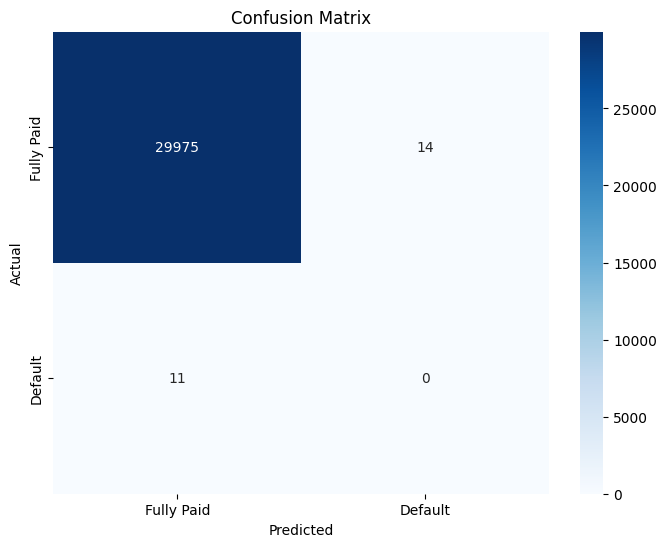

Model Accuracy: 1.00
Classification Report:

              precision    recall  f1-score   support

  Fully Paid       1.00      1.00      1.00     29989
     Default       0.00      0.00      0.00        11

    accuracy                           1.00     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       1.00      1.00      1.00     30000

ROC-AUC Score: 0.55


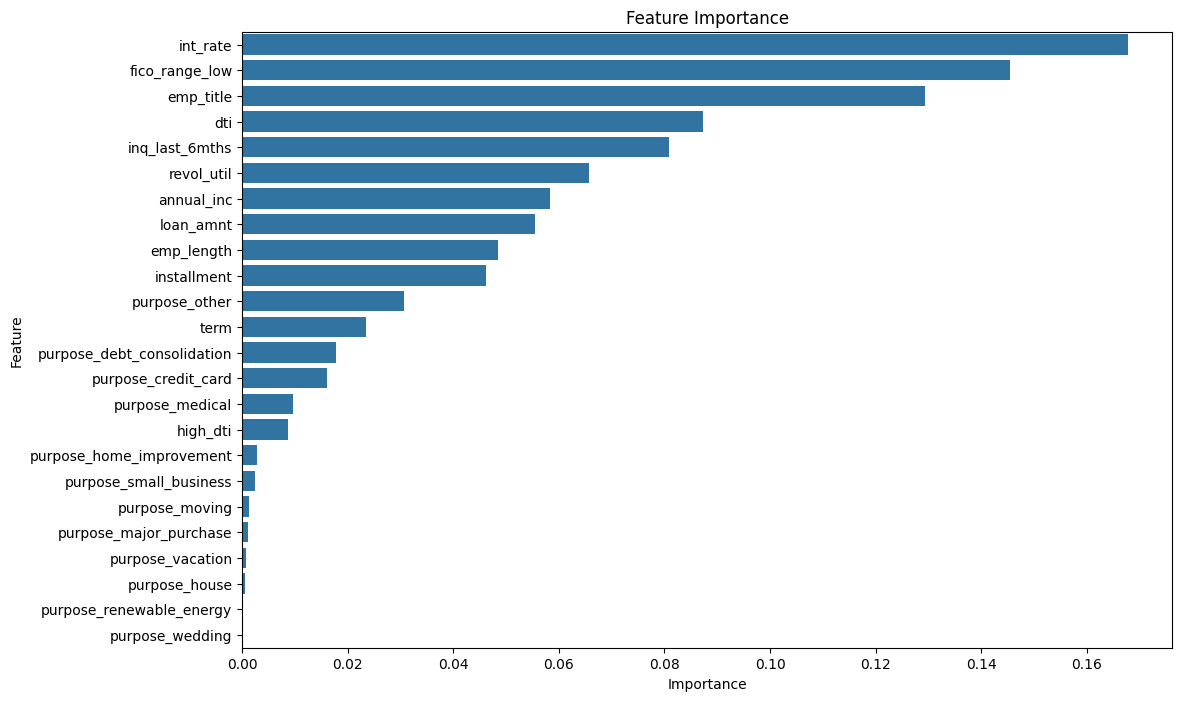

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define class weights using numeric labels - Assign higher weights to the minority class
class_weights = {0: 0.1, 1: 5}  # 'Fully Paid' (0) has lower weight, 'Default' (1) has higher weight

# Train a Random Forest Classifier with class weights
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weights
)
rf_model.fit(X_train_smote, y_train_smote)  # Train on SMOTE-balanced data

# Make predictions on the test data
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of class '1' ("Default")

# Set a custom threshold for classification - to favor the minority class lowering the threshold for predicting "default"
custom_threshold = 0.2
y_pred = (y_pred_proba >= custom_threshold).astype(int)  # Convert probabilities to class labels

# Evaluate with a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Fully Paid', 'Default'], yticklabels=['Fully Paid', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Fully Paid', 'Default']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Feature Importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## **Train with Logistic Regression Model on the feature-engineered dataset**

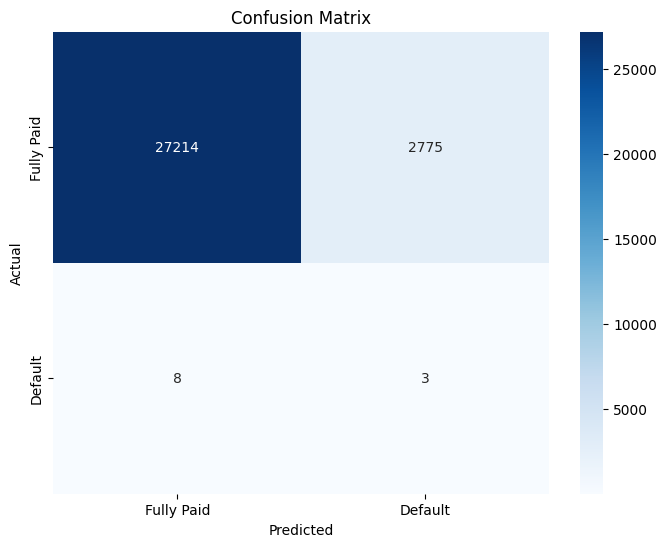

Model Accuracy: 0.91
Classification Report:

              precision    recall  f1-score   support

  Fully Paid       1.00      0.91      0.95     29989
     Default       0.00      0.27      0.00        11

    accuracy                           0.91     30000
   macro avg       0.50      0.59      0.48     30000
weighted avg       1.00      0.91      0.95     30000

ROC-AUC Score: 0.52


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
log_reg.fit(X_train_smote, y_train_smote)  # Train on SMOTE-balanced data

# Make predictions on the test data
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # For ROC-AUC calculation

# Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Fully Paid', 'Default'], yticklabels=['Fully Paid', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Fully Paid', 'Default']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")





## **Train with Gaussian Naive Bayes Model on the feature-engineered dataset**

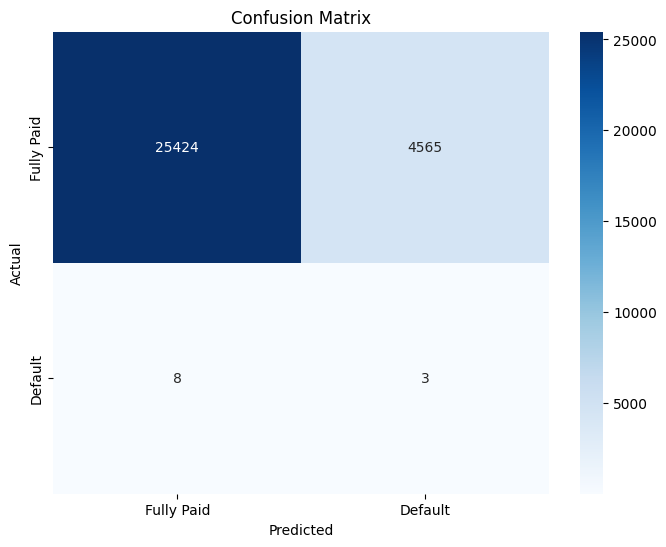

Model Accuracy: 0.85
Classification Report:

              precision    recall  f1-score   support

  Fully Paid       1.00      0.85      0.92     29989
     Default       0.00      0.27      0.00        11

    accuracy                           0.85     30000
   macro avg       0.50      0.56      0.46     30000
weighted avg       1.00      0.85      0.92     30000

ROC-AUC Score: 0.64


In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)  # Train on SMOTE-balanced data

# Make predictions on the test set
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC calculation

# Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Fully Paid', 'Default'], yticklabels=['Fully Paid', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Fully Paid', 'Default']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")
